In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 4.4 MB/s 
     |████████████████████████████████| 140 kB 46.5 MB/s 
     |████████████████████████████████| 256 kB 32.0 MB/s 
     |████████████████████████████████| 1.1 MB 37.3 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 2.0 MB 37.6 MB/s 
     |████████████████████████████████| 212 kB 11.2 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 271 kB 10.7 MB/s 
     |████████████████████████████████| 144 kB 42.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 80 kB 7.5 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 62 kB 

In [2]:
import gradio as gr

In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [4]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


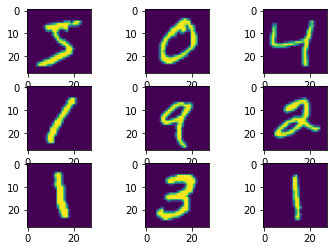

In [5]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [7]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2045 - accuracy: 0.9374
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0887 - accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0655 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0504 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0406 - accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0281 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [10]:
test=test_images[0].reshape(-1,28,28)
pred=model.predict(test)
print(pred)

[[1.6474190e-15 3.4591168e-09 3.7868028e-10 3.7181343e-12 3.7054815e-09
  5.4921879e-15 4.1937264e-22 9.9999952e-01 3.1958512e-11 5.2578497e-07]]


In [11]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred


In [12]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")


In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://49286.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
